<a href="https://colab.research.google.com/github/Remaaa17/Data_Preprocessing-ML/blob/main/EDA_Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('train_u6lujuX_CVtuZ9i (1).csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.shape

(614, 13)

In [ ]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.duplicated().sum()

0

### Visualize the distribution of categorical features

>>**Gender**

In [ ]:
df.Gender.value_counts(dropna=False)

Gender
Male      489
Female    112
NaN        13
Name: count, dtype: int64

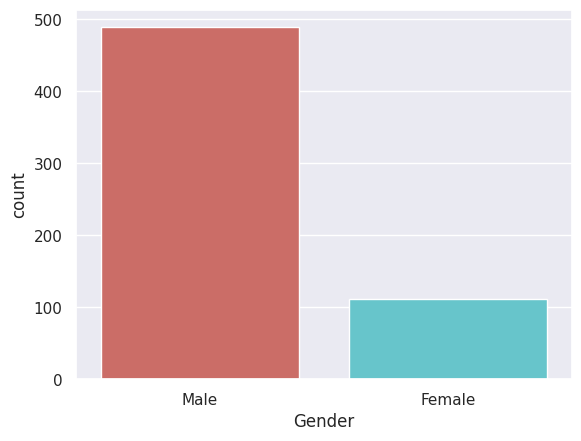

In [ ]:
sns.countplot(x="Gender", data=df, palette="hls")
plt.show()

In [ ]:
countMale = len(df[df.Gender == 'Male'])
countFemale = len(df[df.Gender == 'Female'])
countNull = len(df[df.Gender.isnull()])

print("Percentage of Male applicant: {:.2f}%".format((countMale / (len(df.Gender))*100)))
print("Percentage of Female applicant: {:.2f}%".format((countFemale / (len(df.Gender))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Gender))*100)))

Percentage of Male applicant: 79.64%
Percentage of Female applicant: 18.24%
Missing values percentage: 2.12%


>👉 From the results above, the number of male applicants is higher compared to female applicants. It also can be seen there are missing values in this column.

>>**Married**

In [ ]:
df.Married.value_counts(dropna=False)

Married
Yes    398
No     213
NaN      3
Name: count, dtype: int64

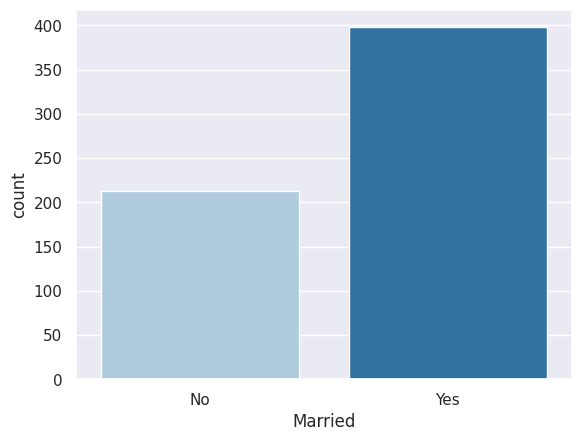

In [ ]:
sns.countplot(x="Married", data=df, palette="Paired")
plt.show()

In [ ]:
countMarried = len(df[df.Married == 'Yes'])
countNotMarried = len(df[df.Married == 'No'])
countNull = len(df[df.Married.isnull()])

print("Percentage of married: {:.2f}%".format((countMarried / (len(df.Married))*100)))
print("Percentage of Not married applicant: {:.2f}%".format((countNotMarried / (len(df.Married))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Married))*100)))

Percentage of married: 64.82%
Percentage of Not married applicant: 34.69%
Missing values percentage: 0.49%


👉 The number of applicants that has been married is higher compared to applicants that hasn't married. It also can be seen there are small number of missing values in this column.

>>**Education**

In [ ]:
df.Education.value_counts(dropna=False)

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

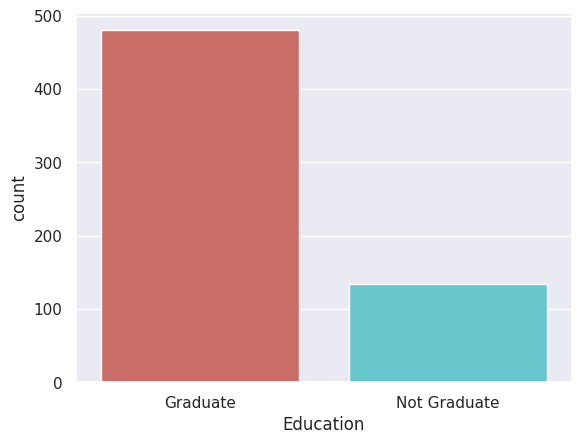

In [ ]:
sns.countplot(x="Education", data=df, palette="hls")
plt.show()

In [ ]:
from itertools import count
countGraduate = len(df[df.Education == 'Graduate'])
countNotGraduate = len(df[df.Education == 'Not Graduate'])
countNull = len(df[df.Education.isnull()])
print("Percentage of graduate applicant: {:.2f}%".format((countGraduate / (len(df.Education))*100)))
print("Percentage of Not graduate applicant: {:.2f}%".format((countNotGraduate / (len(df.Education))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Education))*100)))

Percentage of graduate applicant: 78.18%
Percentage of Not graduate applicant: 21.82%
Missing values percentage: 0.00%


👉 The number of applicants that has been graduated is higher compared to applicants that hasn't graduated.

 >>**Self Employed**

In [ ]:
df.Self_Employed.value_counts(dropna=False)

Self_Employed
No     500
Yes     82
NaN     32
Name: count, dtype: int64

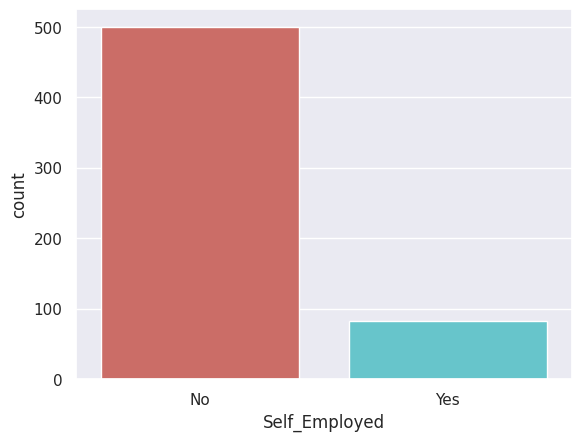

In [ ]:
sns.countplot(x="Self_Employed", data=df, palette="hls")
plt.show()

In [ ]:
countSelfEmployed = len(df[df.Self_Employed == 'Yes'])
countNotSelfEmployed = len(df[df.Self_Employed == 'No'])
countNull = len(df[df.Self_Employed.isnull()])
print("Percentage of self employed applicant: {:.2f}%".format((countSelfEmployed / (len(df.Self_Employed))*100)))
print("Percentage of Not self employed applicant: {:.2f}%".format((countNotSelfEmployed / (len(df.Self_Employed))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Self_Employed))*100)))


Percentage of self employed applicant: 13.36%
Percentage of Not self employed applicant: 81.43%
Missing values percentage: 5.21%


👉 The number of applicants that are not self employed is higher compared to applicants that are self employed. It also can be seen, there are missing values in this column.

>>**Credit History**

In [ ]:
df.Credit_History.value_counts(dropna=False)

Credit_History
1.0    475
0.0     89
NaN     50
Name: count, dtype: int64

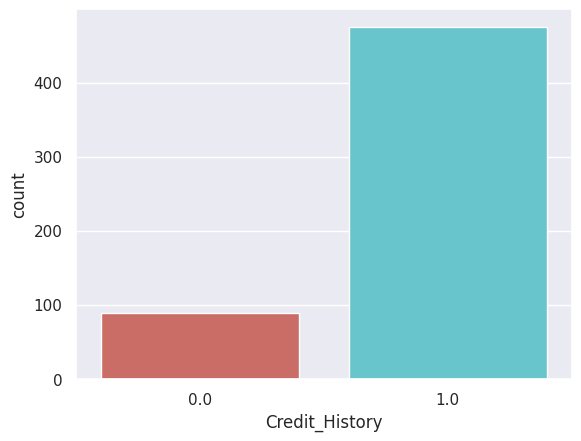

In [ ]:
sns.countplot(x="Credit_History", data=df, palette="hls")
plt.show()

In [ ]:
count1 = len(df[df.Credit_History == 1])
count0 = len(df[df.Credit_History == 0])
countNull = len(df[df.Credit_History.isnull()])

print("Percentage of Good credit history: {:.2f}%".format((count1 / (len(df.Credit_History))*100)))
print("Percentage of Bad credit history: {:.2f}%".format((count0 / (len(df.Credit_History))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Credit_History))*100)))


Percentage of Good credit history: 77.36%
Percentage of Bad credit history: 14.50%
Missing values percentage: 8.14%


👉 The number of applicants that have good credit history is higher compared to applicants that have bad credit history. It also can be seen, there are missing values in this column.

>>**Property Area**

In [ ]:
df.Property_Area.value_counts(dropna=False)

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

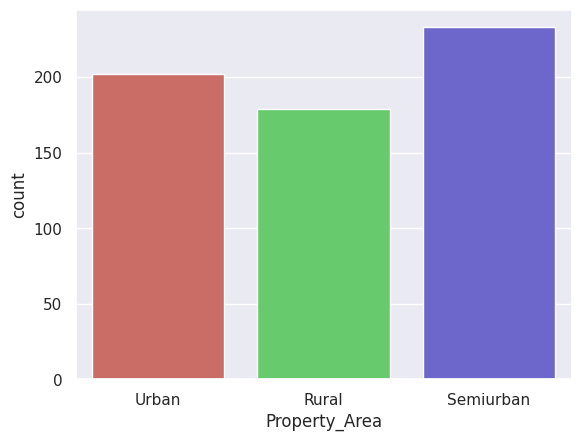

In [ ]:
sns.countplot(x="Property_Area", data=df, palette="hls")
plt.show()

In [ ]:
countUrban = len(df[df.Property_Area == 'Urban'])
countRural = len(df[df.Property_Area == 'Rural'])
countSemiurban = len(df[df.Property_Area == 'Semiurban'])
countNull = len(df[df.Property_Area.isnull()])

print("Percentage of Urban: {:.2f}%".format((countUrban / (len(df.Property_Area))*100)))
print("Percentage of Rural: {:.2f}%".format((countRural / (len(df.Property_Area))*100)))
print("Percentage of Semiurban: {:.2f}%".format((countSemiurban / (len(df.Property_Area))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Property_Area))*100)))

Percentage of Urban: 32.90%
Percentage of Rural: 29.15%
Percentage of Semiurban: 37.95%
Missing values percentage: 0.00%


👉 This column has a balanced distribution between Urban, Rural, and Semiurban property area. It also can be seen there is no missing value.

>>**Loan Status**

In [ ]:
df.Loan_Status.value_counts(dropna=False)

Loan_Status
Y    422
N    192
Name: count, dtype: int64

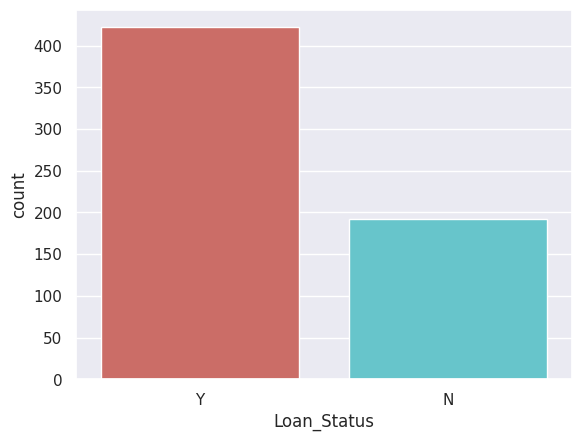

In [ ]:
sns.countplot(x="Loan_Status", data=df, palette="hls")
plt.show()

In [ ]:
countY = len(df[df.Loan_Status == 'Y'])
countN = len(df[df.Loan_Status == 'N'])
countNull = len(df[df.Loan_Status.isnull()])

print("Percentage of Approved: {:.2f}%".format((countY / (len(df.Loan_Status))*100)))
print("Percentage of Rejected: {:.2f}%".format((countN / (len(df.Loan_Status))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Status))*100)))

Percentage of Approved: 68.73%
Percentage of Rejected: 31.27%
Missing values percentage: 0.00%


👉 The number of approved loans is higher compared to rejected loans . It also can be seen, there is no missing values in this column.

 >>Loan Amount Term

In [ ]:
df.Loan_Amount_Term.value_counts(dropna=False)

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

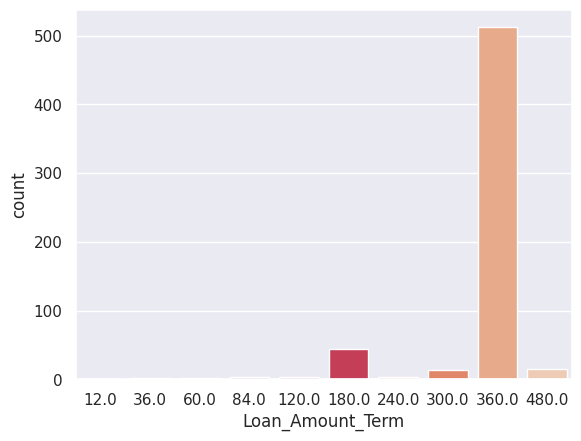

In [ ]:
sns.countplot(x="Loan_Amount_Term", data=df, palette="rocket")
plt.show()

👉 As can be seen from the results, the 360 days loan duration is the most popular compared to others.

###Some Relations

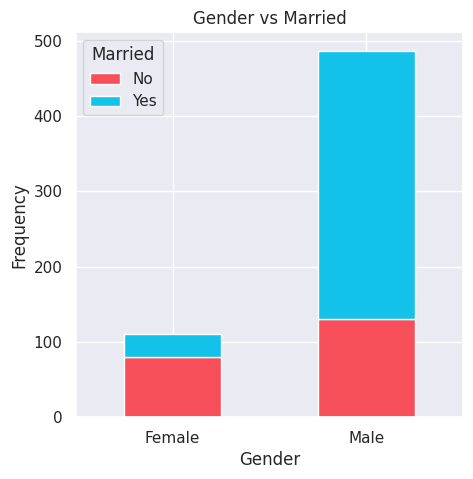

In [ ]:
pd.crosstab(df.Gender,df.Married).plot(kind="bar", stacked=True, figsize=(5,5), color=['#f64f59','#12c2e9'])
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

>> Most male applicants are already married compared to female applicants. Also, the number of not married male applicants are higher compare to female applicants that had not married.

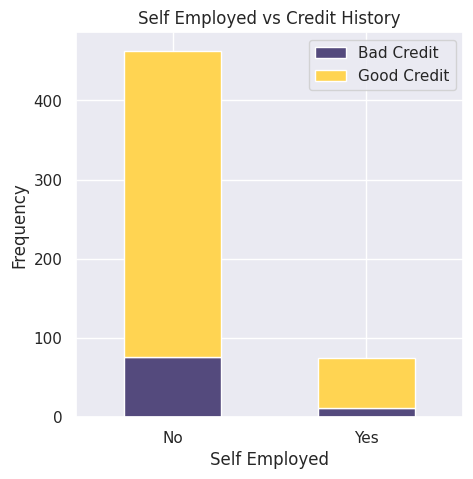

In [ ]:
pd.crosstab(df.Self_Employed,df.Credit_History).plot(kind="bar", stacked=True, figsize=(5,5), color=['#544a7d','#ffd452'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)
plt.show()

>> Most not self employed applicants have good credit compared to self employed applicants.

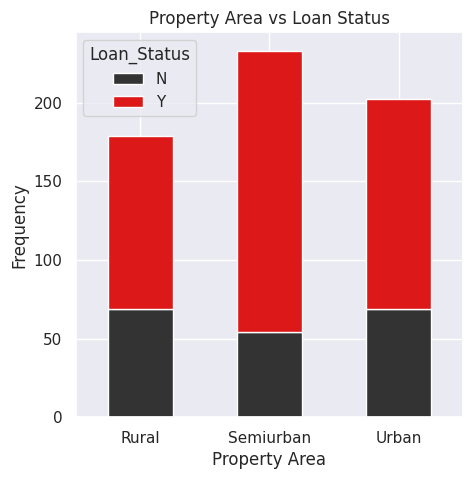

In [ ]:
pd.crosstab(df.Property_Area,df.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['#333333','#dd1818'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

>> Most of loan that got accepted has property in Semiurban compared to Urban and Rural.

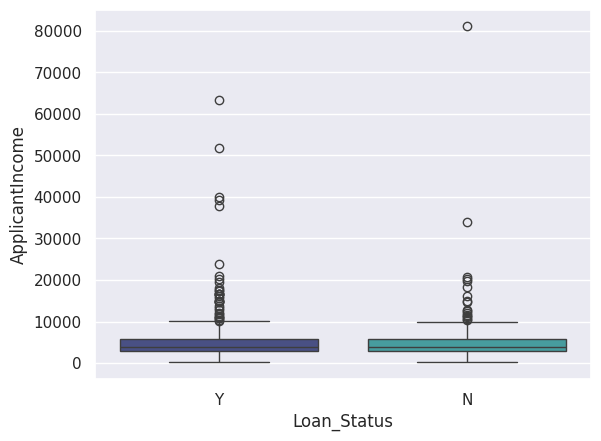

In [ ]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, palette="mako");

>> It can be seen that there are lots of outliers in Applicant Income, and the distribution also positively skewed

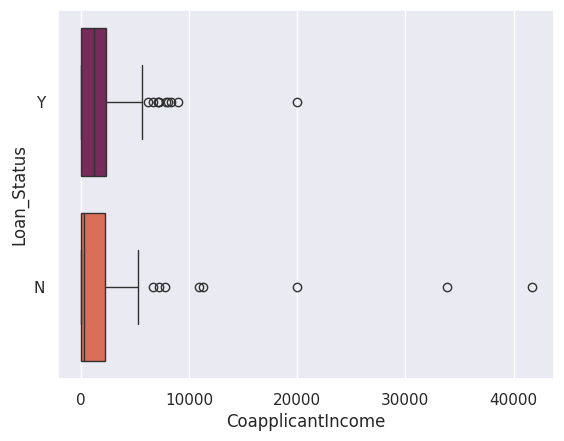

In [ ]:
sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=df, palette="rocket");

>> It's clear that Co Applicant Income has a number of outliers, and the distribution is also positively skewed.

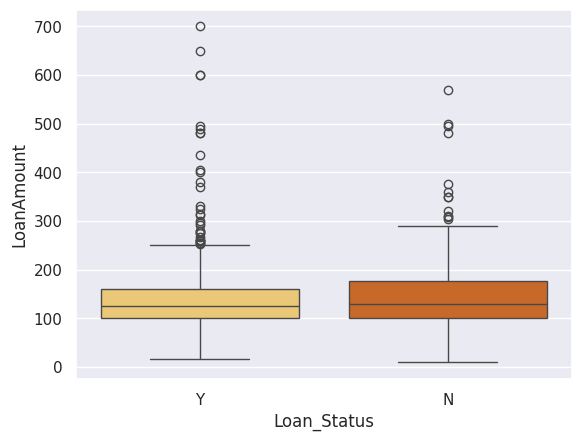

In [ ]:
sns.boxplot(x="Loan_Status", y="LoanAmount", data=df, palette="YlOrBr");


>> As can be seen, Co Applicant Income has a high number of outliers, and the distribution is also positively skewed

#### Visualize the distribution of numerical features

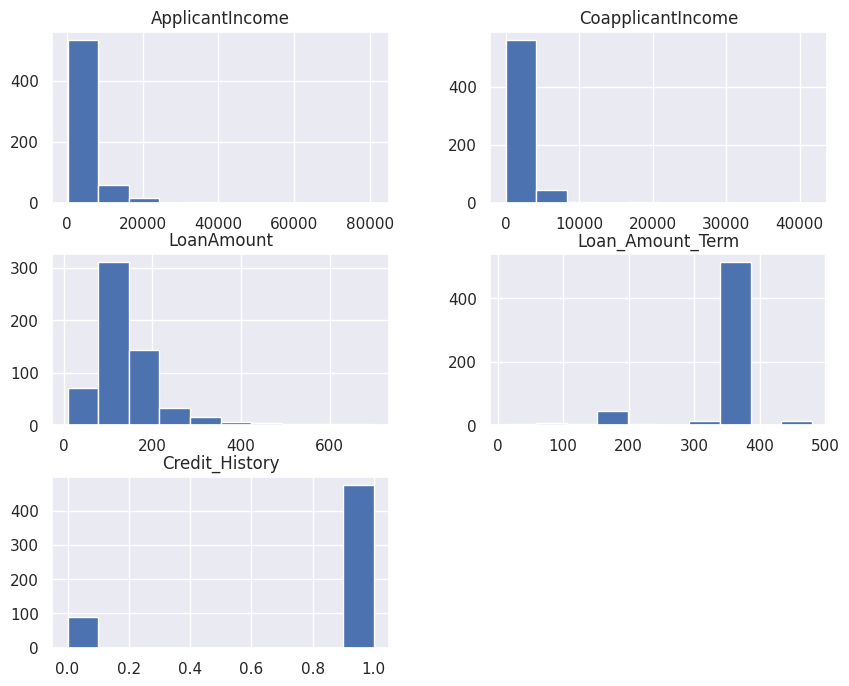

In [ ]:

numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
df[numerical_features].hist(figsize=(10, 8))
plt.show()

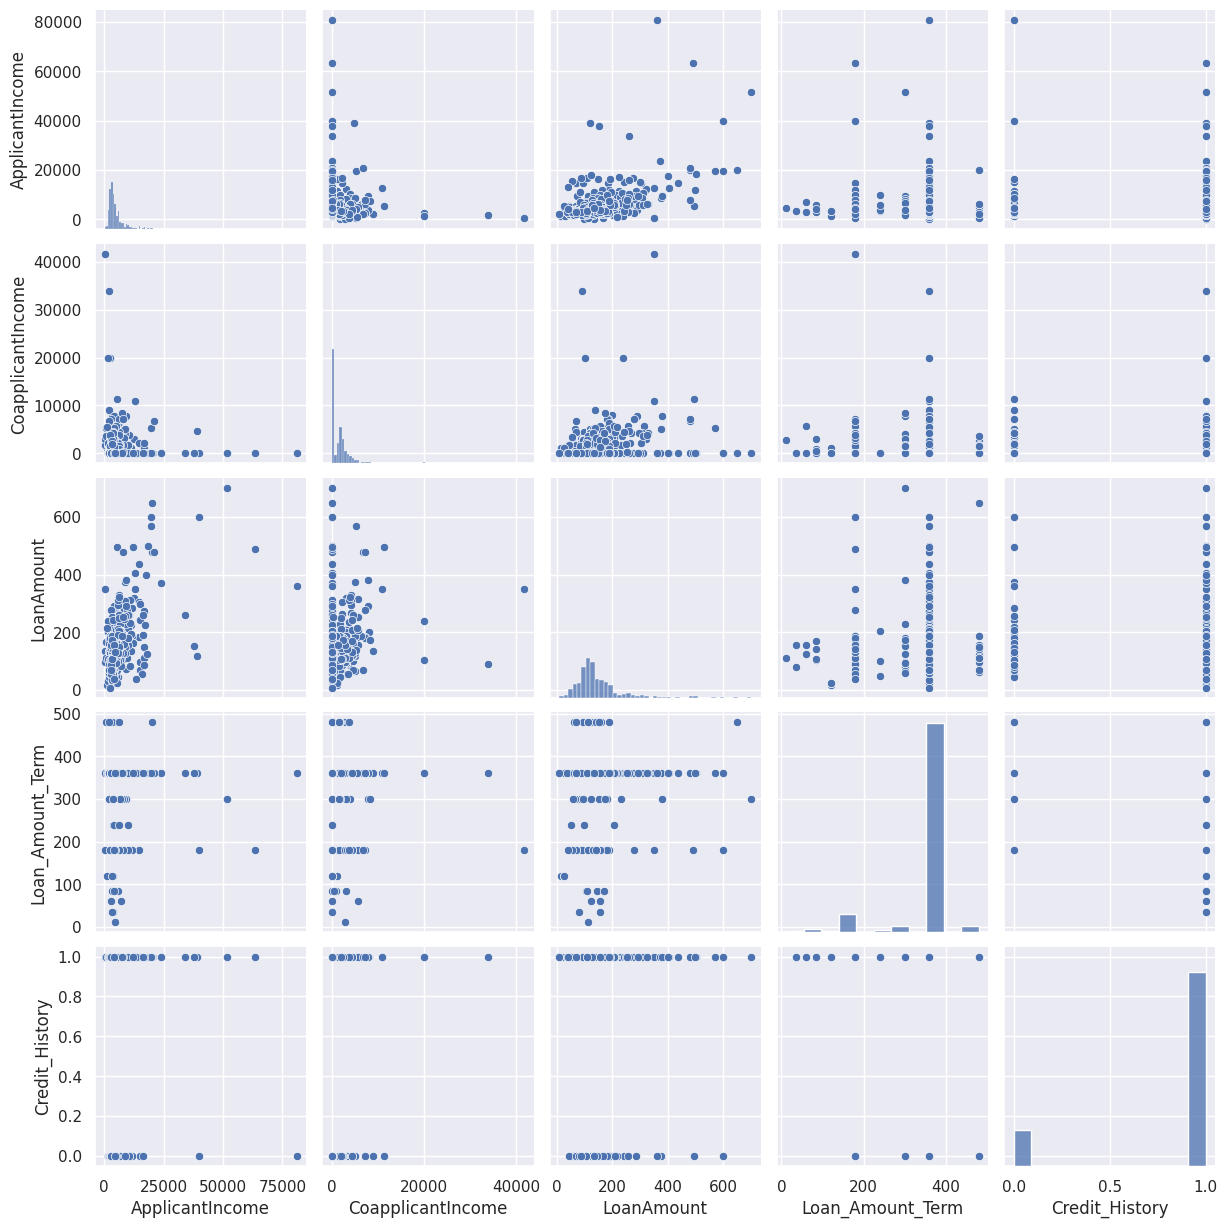

In [ ]:
sns.pairplot(df[numerical_features])
plt.show()

###Heatmap 🔥

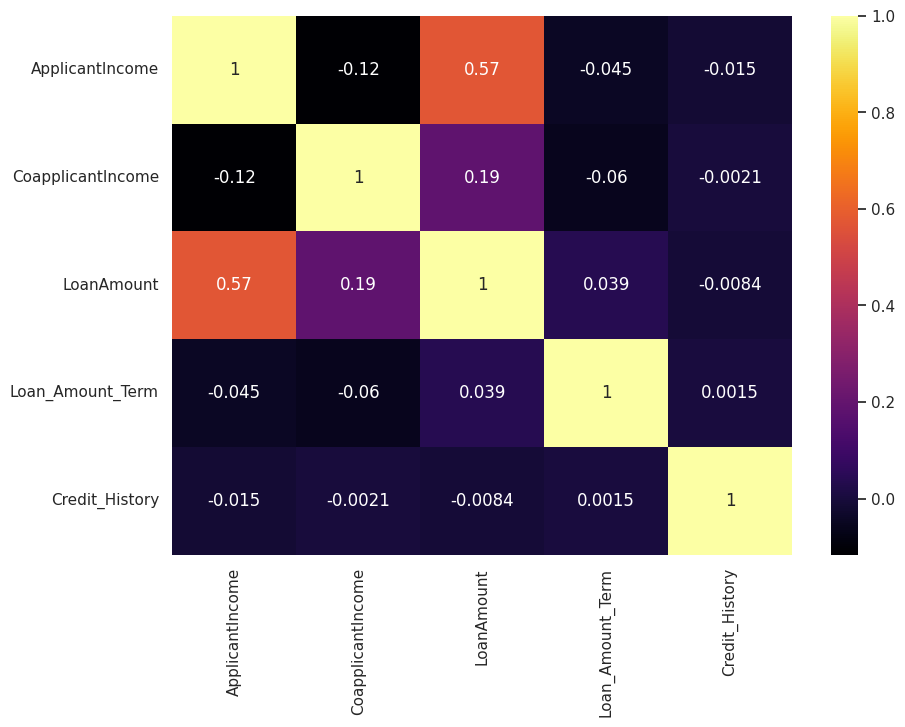

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Select only numerical columns before calculating correlations
numerical_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10,7))
sns.heatmap(numerical_df.corr(), annot=True, cmap='inferno')
plt.show()

👉 There is positive correlation between Loan Amount and Applicant Income

###Preprocessing




>**Drop Unecessary Variables**

In [ ]:

df = df.drop(['Loan_ID'], axis = 1)

> **Fill missing categorical values**

In [ ]:
# Fill missing categorical values with the mode
categorical_features_with_missing = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']
for feature in categorical_features_with_missing:
    df[feature].fillna(df[feature].mode()[0], inplace=True)


> **Fill missing numerical values**

In [ ]:
# Fill missing numerical values with the median
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)


In [ ]:

# Verify that there are no missing values left
print(df.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


####Remove Outliers & Infinite values

In [ ]:
# Separate numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = df.select_dtypes(exclude=['float64', 'int64']).columns

# Calculate IQR for numeric columns only
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df_filtered = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


###Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features using LabelEncoder
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
encoder = LabelEncoder()
for feature in categorical_features:
    df[feature] = encoder.fit_transform(df[feature])

df.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


###Check Data Balance

Loan Status counts:
 Loan_Status
1    422
0    192
Name: count, dtype: int64


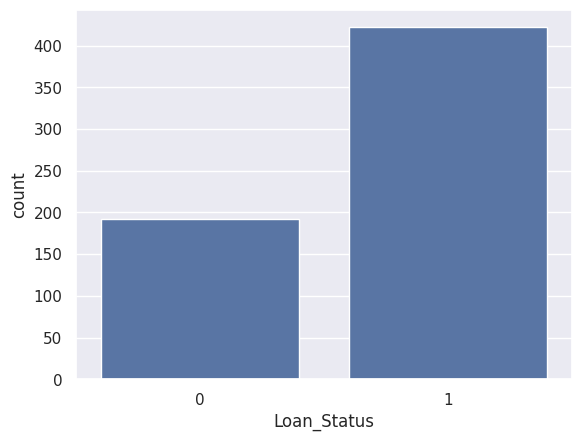

In [ ]:
# Check the balance of the target variable
loan_status_counts = df['Loan_Status'].value_counts()
print("Loan Status counts:\n", loan_status_counts)

# Visualize the balance of the target variable
sns.countplot(data=df, x='Loan_Status')
plt.show()


In [ ]:
!pip install imbalanced-learn


###Modling

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Separate features and target
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']


In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

>**SMOTE Technique**

>>👉 In previous exploration, it can be seen that the number between approved and rejected loan is imbalanced. In this section, oversampling technique will be used to avoid overfitting,

In [ ]:
X, y = SMOTE().fit_resample(X, y)

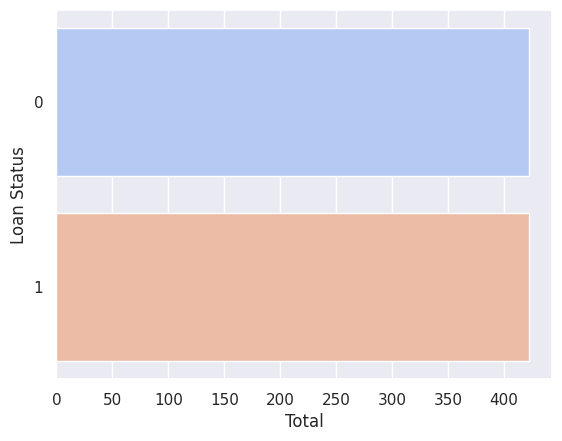

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=df, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

>> As can be seen, the distrubtion of Loan status are now balanced.

# ---------- Models before scaling ----------


###Gaussian Naive Bayes

In [ ]:
# Train and evaluate Gaussian Naive Bayes before scaling
gnb_before = GaussianNB()
gnb_before.fit(X, y)
y_pred_gnb_before = gnb_before.predict(X_test)

In [ ]:


print("GaussianNB (Before Scaling) Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gnb_before))
print("\nGaussianNB (Before Scaling) Classification Report:")
print(classification_report(y_test, y_pred_gnb_before))
print("\nGaussianNB (Before Scaling) Accuracy:")
print(accuracy_score(y_test, y_pred_gnb_before))


GaussianNB (Before Scaling) Confusion Matrix:
[[17 16]
 [ 8 82]]

GaussianNB (Before Scaling) Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.52      0.59        33
           1       0.84      0.91      0.87        90

    accuracy                           0.80       123
   macro avg       0.76      0.71      0.73       123
weighted avg       0.79      0.80      0.80       123


GaussianNB (Before Scaling) Accuracy:
0.8048780487804879


###Multinomial Naive Bayes

In [ ]:
# Train and evaluate Multinomial Naive Bayes before scaling
mnb_before = MultinomialNB()
mnb_before.fit(X, y)
y_pred_mnb_before = mnb_before.predict(X_test)

In [ ]:
print("\nMultinomialNB (Before Scaling) Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_mnb_before))
print("\nMultinomialNB (Before Scaling) Classification Report:")
print(classification_report(y_test, y_pred_mnb_before))
print("\nMultinomialNB (Before Scaling) Accuracy:")
print(accuracy_score(y_test, y_pred_mnb_before))


MultinomialNB (Before Scaling) Confusion Matrix:
[[17 16]
 [54 36]]

MultinomialNB (Before Scaling) Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.52      0.33        33
           1       0.69      0.40      0.51        90

    accuracy                           0.43       123
   macro avg       0.47      0.46      0.42       123
weighted avg       0.57      0.43      0.46       123


MultinomialNB (Before Scaling) Accuracy:
0.43089430894308944


###Bernoulli Naive Bayes

In [ ]:

# Train and evaluate Bernoulli Naive Bayes before scaling
bnb_before = BernoulliNB()
bnb_before.fit(X, y)
y_pred_bnb_before = bnb_before.predict(X_test)

In [ ]:
print("\nBernoulliNB (Before Scaling) Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_bnb_before))
print("\nBernoulliNB (Before Scaling) Classification Report:")
print(classification_report(y_test, y_pred_bnb_before))
print("\nBernoulliNB (Before Scaling) Accuracy:")
print(accuracy_score(y_test, y_pred_bnb_before))


BernoulliNB (Before Scaling) Confusion Matrix:
[[24  9]
 [20 70]]

BernoulliNB (Before Scaling) Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.73      0.62        33
           1       0.89      0.78      0.83        90

    accuracy                           0.76       123
   macro avg       0.72      0.75      0.73       123
weighted avg       0.79      0.76      0.77       123


BernoulliNB (Before Scaling) Accuracy:
0.7642276422764228


# ---------- Models after scaling ---------

###Data Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # Use the same scaler fitted on training data to transform test data


###Gaussian Naive Bayes

In [ ]:
# Train and evaluate Gaussian Naive Bayes after scaling
gnb_after = GaussianNB()
gnb_after.fit(X, y)
y_pred_gnb_after = gnb_after.predict(X_test )
accuracy_gnb_after = accuracy_score(y_test, y_pred_gnb_after)

In [ ]:
print("\nGaussianNB (After Scaling) Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gnb_after))
print("\nGaussianNB (After Scaling) Classification Report:")
print(classification_report(y_test, y_pred_gnb_after))
print("\nGaussianNB (After Scaling) Accuracy:")
print(accuracy_score(y_test, y_pred_gnb_after))



GaussianNB (After Scaling) Confusion Matrix:
[[14 19]
 [ 2 88]]

GaussianNB (After Scaling) Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123


GaussianNB (After Scaling) Accuracy:
0.8292682926829268


###Bernoulli Naive Bayes

In [ ]:
# Train and evaluate Bernoulli Naive Bayes after scaling
bnb_after = BernoulliNB()
bnb_after.fit(X,y )
y_pred_bnb_after = bnb_after.predict(X_test)
accuracy_bnb_after = accuracy_score(y_test, y_pred_bnb_after)

In [ ]:
print("\nBernoulliNB (After Scaling) Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_bnb_after))
print("\nBernoulliNB (After Scaling) Classification Report:")
print(classification_report(y_test, y_pred_bnb_after))
print("\nBernoulliNB (After Scaling) Accuracy:")
print(accuracy_score(y_test, y_pred_bnb_after))


BernoulliNB (After Scaling) Confusion Matrix:
[[24  9]
 [20 70]]

BernoulliNB (After Scaling) Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.73      0.62        33
           1       0.89      0.78      0.83        90

    accuracy                           0.76       123
   macro avg       0.72      0.75      0.73       123
weighted avg       0.79      0.76      0.77       123


BernoulliNB (After Scaling) Accuracy:
0.7642276422764228


### Multinomial Naive Bayes

In [ ]:
# Train and evaluate Multinomial Naive Bayes after scaling
mnb_after = MultinomialNB()

mnb_after.fit(X, y)
y_pred_mnb_after = mnb_after.predict(X_test)
accuracy_mnb_after = accuracy_score(y_test, y_pred_mnb_after)

In [ ]:
print("\nMultinomialNB (After Scaling) Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_mnb_after))
print("\nMultinomialNB (After Scaling) Classification Report:")
print(classification_report(y_test, y_pred_mnb_after))
print("\nMultinomialNB (After Scaling) Accuracy:")
print(accuracy_score(y_test, y_pred_mnb_after))


MultinomialNB (After Scaling) Confusion Matrix:
[[ 0 33]
 [ 0 90]]

MultinomialNB (After Scaling) Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.73      1.00      0.85        90

    accuracy                           0.73       123
   macro avg       0.37      0.50      0.42       123
weighted avg       0.54      0.73      0.62       123


MultinomialNB (After Scaling) Accuracy:
0.7317073170731707


>Best Modle
* GaussianNB (Before Scaling) Accuracy:0.8048780487804879=>80.05%
* GaussianNB (After Scaling) Accuracy: 0.8292682926829268=>82.93%

